In [6]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

In [13]:
def before_oracle(circuit, qbits):
    circuit.x(qbits[1])    # Ancilla qubit
    circuit.barrier()

    circuit.h(qbits[0])
    circuit.h(qbits[1])
    circuit.barrier()
    
    return circuit

In [22]:
# Black Box! (Refer Microsoft vids)
def oracle_function_constant(circuit, qbits):
#   Keep this empty for Constant-0 function
    circuit.x(qbits[1])    # Constant-1 function
    circuit.barrier()
    return circuit

def oracle_function_balanced(circuit, qbits):
    circuit.cx(qbits[0], qbits[1])    # Identity function
#     circuit.x(qbits[0])    Add this for Negation function
    circuit.barrier()
    return circuit

In [23]:
def after_oracle(circuit, qbits, cbits):
    circuit.h(qbits[0])
    circuit.h(qbits[1])
    
    return circuit

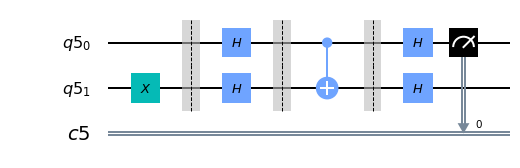

In [24]:
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

# Before oracle function
before_oracle(circuit, qr)

# Oracale function here!
# oracle_function_constant(circuit, qr)
oracle_function_balanced(circuit, qr)

# After oracle function
after_oracle(circuit, qr, cr)
circuit.measure(qr[0], cr[0])


circuit.draw('mpl')

{'1': 1024}


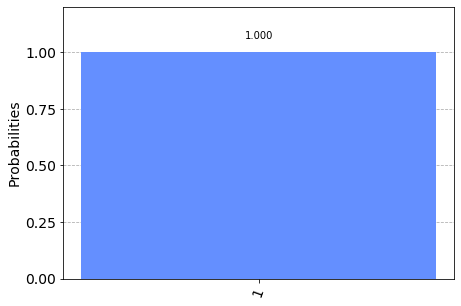

In [25]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)
# Outputs 0 for constant function and 1 for balanced function

In [26]:
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
backend = provider.backends(simulator = False)
qcomp = least_busy(backend)
job = execute(circuit, qcomp)
print('Using the least busy device: ', qcomp.name())
job_monitor(job)

Using the least busy device:  ibmq_essex
Job Status: job has successfully run


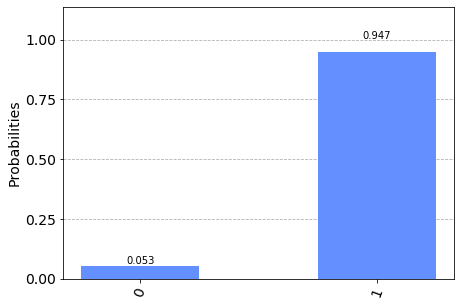

In [32]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)